In [1]:
import IPython
import os
os.system("ls *.md | grep -Ev 'README|audris|avalesky|ports|info|Preliminary' | sed 's/\.md$//'| sort -u >ids.txt")
with open('ids.txt') as f:
    files = [ x.strip('\n') for x in f.readlines() ]
print (files)

['abrelsfo', 'acliff', 'ahranov', 'bfriend2', 'cbleker', 'cfabian', 'cpayne30', 'cshurtle', 'dagrawa2', 'dlowe7', 'dpak1', 'drao', 'eleffler', 'gliso', 'hchoi6', 'jadams45', 'jcate6', 'jhende49', 'jmill225', 'jswart1', 'jzhao25', 'kdawes', 'kgardn15', 'kwang40', 'kye2', 'lmills9', 'miblake6', 'mmacneil', 'nshah7', 'pleffler', 'prq856', 'rriedel1', 'sbeztch1', 'smarcus5', 'snorem1', 'tricha32', 'vargo3', 'vmarti12', 'wck942', 'wharri36', 'wileliff', 'wvaugha2', 'yli137']


In [2]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
documents = []

text = ""
for f in files:
  a = open (f+".md")
  str = a.read()
  documents .append(str)
  text = text + " " + str
      
#Do tf.idf magic 
tfidf = TfidfVectorizer().fit_transform(documents)
# no need to normalize, since Vectorizer will return normalized tf-idf
# we may want to see these, e.g., analyze in R
pd .DataFrame.from_records(tfidf.A).to_csv('tfidf.csv')

In [3]:
# Lets see the similarity matrix
# first create labels
idx = {}
for i in range(len(files)):
    idx[i] = files [i]

# Multiply the tfidf matrix to get all pairwise distances    
df = pd. DataFrame.from_records((tfidf * tfidf.T).A,columns=files)

#do pretty printing
pd.options.display.float_format = '{:20,.3f}'.format
df = df.rename(index=idx)
#Output to a file in case we want to look at it separately
df.to_csv("dist.csv")
df

,abrelsfo,acliff,ahranov,bfriend2,cbleker,cfabian,cpayne30,cshurtle,dagrawa2,dlowe7,...,smarcus5,snorem1,tricha32,vargo3,vmarti12,wck942,wharri36,wileliff,wvaugha2,yli137
abrelsfo,1.000,0.069,0.146,0.071,0.119,0.094,0.013,0.067,0.122,0.148,...,0.074,0.004,0.101,0.025,0.087,0.123,0.045,0.090,0.017,0.000
acliff,0.069,1.000,0.132,0.090,0.261,0.153,0.091,0.101,0.183,0.081,...,0.109,0.069,0.101,0.084,0.070,0.044,0.230,0.178,0.058,0.025
ahranov,0.146,0.132,1.000,0.104,0.121,0.124,0.170,0.085,0.147,0.081,...,0.108,0.132,0.067,0.036,0.062,0.188,0.132,0.189,0.090,0.047
bfriend2,0.071,0.090,0.104,1.000,0.114,0.141,0.052,0.060,0.094,0.062,...,0.098,0.050,0.081,0.043,0.071,0.126,0.102,0.059,0.051,0.000
cbleker,0.119,0.261,0.121,0.114,1.000,0.164,0.083,0.105,0.205,0.143,...,0.142,0.119,0.194,0.065,0.098,0.155,0.120,0.158,0.101,0.000
cfabian,0.094,0.153,0.124,0.141,0.164,1.000,0.034,0.076,0.155,0.125,...,0.144,0.043,0.199,0.080,0.061,0.109,0.081,0.088,0.126,0.000
cpayne30,0.013,0.091,0.170,0.052,0.083,0.034,1.000,0.063,0.062,0.067,...,0.037,0.062,0.054,0.000,0.040,0.071,0.185,0.253,0.018,0.090
cshurtle,0.067,0.101,0.085,0.060,0.105,0.076,0.063,1.000,0.067,0.145,...,0.075,0.027,0.097,0.000,0.137,0.101,0.067,0.080,0.057,0.000
dagrawa2,0.122,0.183,0.147,0.094,0.205,0.155,0.062,0.067,1.000,0.130,...,0.141,0.060,0.128,0.065,0.058,0.079,0.130,0.175,0.073,0.000
dlowe7,0.148,0.081,0.081,0.062,0.143,0.125,0.067,0.145,0.130,1.000,...,0.118,0.063,0.193,0.000,0.065,0.114,0.094,0.137,0.069,0.032


1.414213562373095
[ 0.93061434]


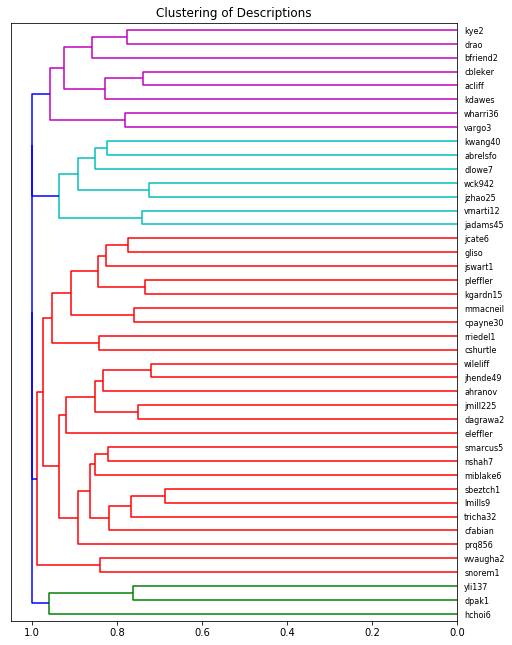

In [4]:
from scipy.cluster.hierarchy import linkage, ward, dendrogram
from scipy.spatial.distance import pdist
import math
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline
# Clean up labels (remove .md at the end)
flab = files
for i in range(len(files)):
    flab[i] = re.sub(r"\.[mM][dD]$", "", files[i])


dist2 = pdist(tfidf.A, 'euclidean')
#dist ij = dist2 [i*(n-1)+j]
ab = np.dot(tfidf.A[0,:]-tfidf.A[42,:],
            tfidf.A[0,:]-tfidf.A[42,:])
aa = np.dot(tfidf.A[0,:],tfidf.A[0,:])
bb = np.dot(tfidf.A[42,:],tfidf.A[42,:])
print(math.sqrt(ab/aa/bb))


# Calculate cosine distance (clustering needs distance, not similarity)   
dist1 = pdist(tfidf.A, 'cosine')
print (dist1[:1])
# Do clustering
linkage_matrix = linkage(dist1,method='complete')
#print(linkage_matrix)
# Plot results
fig = plt.figure(1, figsize=(8, 11))
plt.clf()
ddata = dendrogram(linkage_matrix,
               color_threshold=1,
               p=97,
               labels=flab,
               truncate_mode='none',
               orientation='left',
                show_leaf_counts=True,
               )
plt.title("Clustering of Descriptions")
fig.savefig("teaming.png")


In [5]:
import networkx as nx
import json
nxg = nx.Graph()

for i in range(len(files)-1):
    for j in range(i+1,len(files)):
        if (df.iloc[i,j] > .2):
            nxg.add_edge(flab[i], flab[j], weight=df.iloc[i,j],color='r')
    
print (nxg.nodes())

['tricha32', 'jhende49', 'sbeztch1', 'pleffler', 'vmarti12', 'kye2', 'wharri36', 'wvaugha2', 'lmills9', 'yli137', 'eleffler', 'mmacneil', 'nshah7', 'jcate6', 'kdawes', 'kgardn15', 'jadams45', 'vargo3', 'jmill225', 'smarcus5', 'cfabian', 'hchoi6', 'miblake6', 'dlowe7', 'wileliff', 'cpayne30', 'kwang40', 'drao', 'gliso', 'cbleker', 'acliff', 'jzhao25', 'dpak1', 'jswart1', 'wck942', 'dagrawa2']


In [7]:
from networkx.readwrite import json_graph
nld = json_graph.node_link_data(nxg)
json.dump(nld, open('students.json','w'))

In [9]:
from IPython.display import IFrame
from IPython.core.display import display
# IPython Notebook can serve files and display them into
# inline frames. Prepend the path with the 'files' prefix.
viz_file = 'files/students.html'
display(IFrame(viz_file, '100%', '600px'))